Find and plot the temperature gradient and the shock direction.
NB: problems in plotting due to the scale of ax.quiver.
NB: you produce and save plot not txt or other data

In [1]:
import sys
sys.path.append('/Users/paolamartire/shocks')

import numpy as np
import matplotlib.pyplot as plt
import Utilities.prelude

from Utilities.operators import make_tree, calc_grad

In [2]:
gamma = 5/3
mach_min = 1.3

In [3]:
sim_tree, X, Y, Z, Vol, VX, VY, VZ, Den, P, Temp = make_tree('data_sim')
dim_cell = (3*Vol/(4*np.pi))**(1/3)

all T=0, bro. CHANGE!


In [ ]:
step = 2*np.min(dim_cell)

In [4]:
# - gradient of T
gradx = []
grady = []
X_cell = [] # len = (len(x_array)-2)**2 i.e. every combination of x and y (without the edges)
Y_cell = []
Z_cell = []

for i in range(len(X)):
    point = [X[i],Y[i],Z[i]]
    grad =  calc_grad(sim_tree, X, Y, Z, Temp, point, step)
    if np.logical_and(np.abs(grad[0])>0.1, np.logical_and(np.abs(grad[1])>0.1, np.abs(grad[2])>0.1)):
        gradx.append(-grad[0])
        grady.append(-grad[1])
        X_cell.append(X[i])
        Y_cell.append(Y[i])
        Z_cell.append(Z[i])

/Users/paolamartire/shocks/Utilities/operators.py:174: RuntimeWarning: invalid value encountered in scalar divide
  delta_fy = (fpost_y-fpre_y)/ (post_ycoord-pre_ycoord)
/Users/paolamartire/shocks/Utilities/operators.py:173: RuntimeWarning: invalid value encountered in scalar divide
  delta_fx = (fpost_x-fpre_x) / (post_xcoord-pre_xcoord)
/Users/paolamartire/shocks/Utilities/operators.py:175: RuntimeWarning: invalid value encountered in scalar divide
  delta_fz = (fpost_z-fpre_z) / (post_zcoord-pre_zcoord)


In [5]:
# Cross section 
z_chosen = 0
x_radii = []
y_radii = []
flat_T = []

X_cell_plot = []
Y_cell_plot = []
gradx_plot = []
grady_plot = []

for i,z_val in enumerate(Z):
    if np.abs(z_val) < z_chosen + 0.1:
        x_radii.append(X[i])
        y_radii.append(Y[i])
        flat_T.append(Temp[i])
for i,z_val in enumerate(Z_cell):
    if np.abs(z_val) < z_chosen + 0.1:
        X_cell_plot.append(X_cell[i])
        Y_cell_plot.append(Y_cell[i])
        gradx_plot.append(gradx[i])
        grady_plot.append(grady[i])

T_plot = np.log10(flat_T)
T_plot = np.nan_to_num(T_plot, neginf = 0)

x_radii = np.array(x_radii)
y_radii = np.array(y_radii)
gradx_plot = np.array(gradx_plot)
grady_plot = np.array(grady_plot)


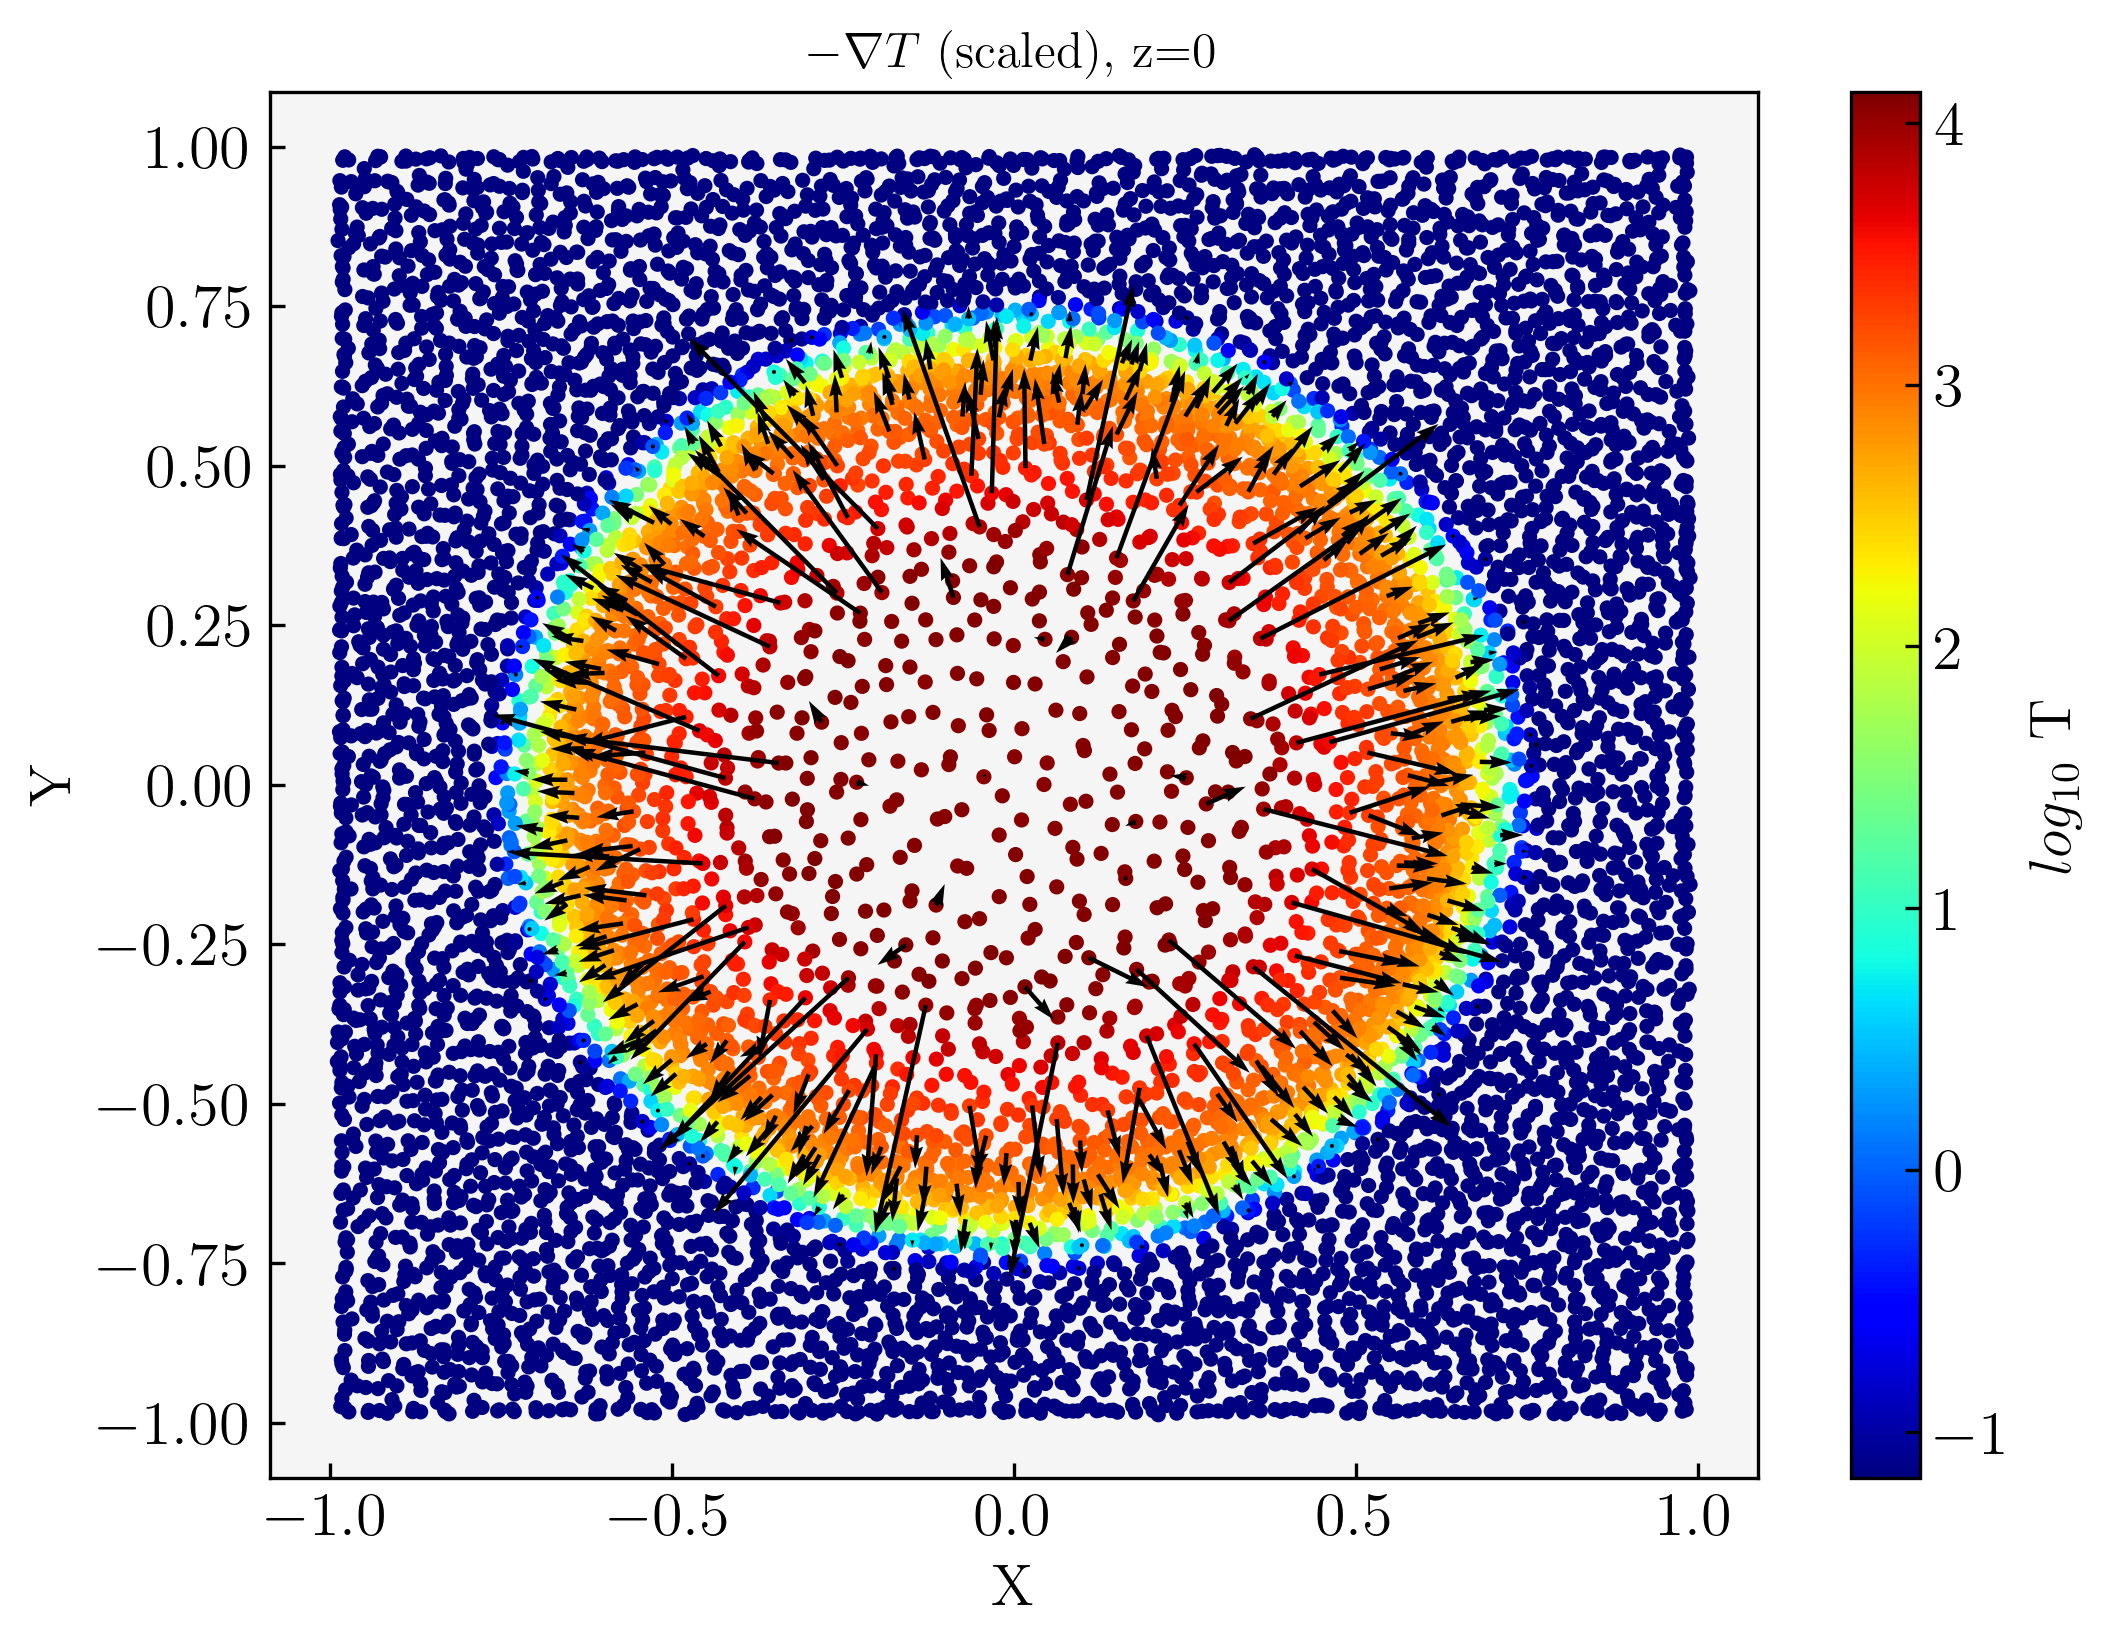

In [16]:
# - Gradient T
fig, ax = plt.subplots(1,1)
ax.set_xlabel('X', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
img = ax.scatter(x_radii, y_radii, c = T_plot, s = 7, cmap = 'jet')
cb = plt.colorbar(img)
cb.set_label(r'$log_{10}$ T', fontsize = 14)
ax.quiver(X_cell_plot[::10], Y_cell_plot[::10], gradx_plot[::10], grady_plot[::10], color = 'k', angles='xy', scale_units='xy', scale=2e5)# arrow_length_ratio=0.1, color = 'k')
plt.title(r'$-\nabla T$ (scaled), ' f'z={z_chosen}')
plt.savefig(f'Figs/1Tslice_grad.png')

Now we do the same thing but with shock direction (i.e. (opposite of the) gradient of temperature normalised)

In [7]:
def shock_direction(sim_tree, X, Y, Z, Temp, point, delta):
    """ Find shock direction according eq.(5) by Schaal14 in the point of coordinates indices idx.
    Parameters
    -----------
    sim_tree: nDarray.
            Tree where to search the point.
    X, Y, Z, Temp: arrays.
            Coordinates and temperature of the points of the tree.
    point: array.
            Starting point.
    delta: float.
            Step between 2 neighbours.
    Returns
    -----------
    ds: array.
        Shock direction (vector of 3 components).
    """
    grad = calc_grad(sim_tree, X, Y, Z, Temp, point, delta)
    magnitude = np.linalg.norm(grad)
    
    if np.logical_and(np.abs(grad[0])<0.1, np.logical_and(np.abs(grad[1])<0.1, np.abs(grad[2])<0.1)):
        ds = [0, 0, 0]
    else:
        ds = - np.divide(grad,magnitude)
    return ds

In [17]:
# Shock direction
ds_x = []
ds_y = []
X_ds = []
Y_ds= []
Z_ds= []
for i in range(len(X)):
    point = [X[i],Y[i],Z[i]]
    ds =  shock_direction(sim_tree, X, Y, Z, Temp, point, step)
    if np.logical_and(np.abs(ds[0])>0, np.logical_and(np.abs(ds[1])>0, np.abs(ds[2])>0)): 
        ds_x.append(ds[0])
        ds_y.append(ds[1])
        X_ds.append(X[i])
        Y_ds.append(Y[i])
        Z_ds.append(Z[i])


/Users/paolamartire/shocks/Utilities/operators.py:174: RuntimeWarning: invalid value encountered in scalar divide
  delta_fy = (fpost_y-fpre_y)/ (post_ycoord-pre_ycoord)
/Users/paolamartire/shocks/Utilities/operators.py:173: RuntimeWarning: invalid value encountered in scalar divide
  delta_fx = (fpost_x-fpre_x) / (post_xcoord-pre_xcoord)
/Users/paolamartire/shocks/Utilities/operators.py:175: RuntimeWarning: invalid value encountered in scalar divide
  delta_fz = (fpost_z-fpre_z) / (post_zcoord-pre_zcoord)


In [18]:
# Cross section 
X_ds_plot = []
Y_ds_plot = []
dsx_plot = []
dsy_plot = []

for i,z_val in enumerate(Z_ds):
    if np.abs(z_val) < z_chosen + 0.1:
        X_ds_plot.append(X_ds[i])
        Y_ds_plot.append(Y_ds[i])
        dsx_plot.append(ds_x[i])
        dsy_plot.append(ds_y[i])

X_ds_plot = np.array(X_ds_plot)
Y_ds_plot = np.array(Y_ds_plot)
dsx_plot = np.array(dsx_plot)
dsy_plot = np.array(dsy_plot)


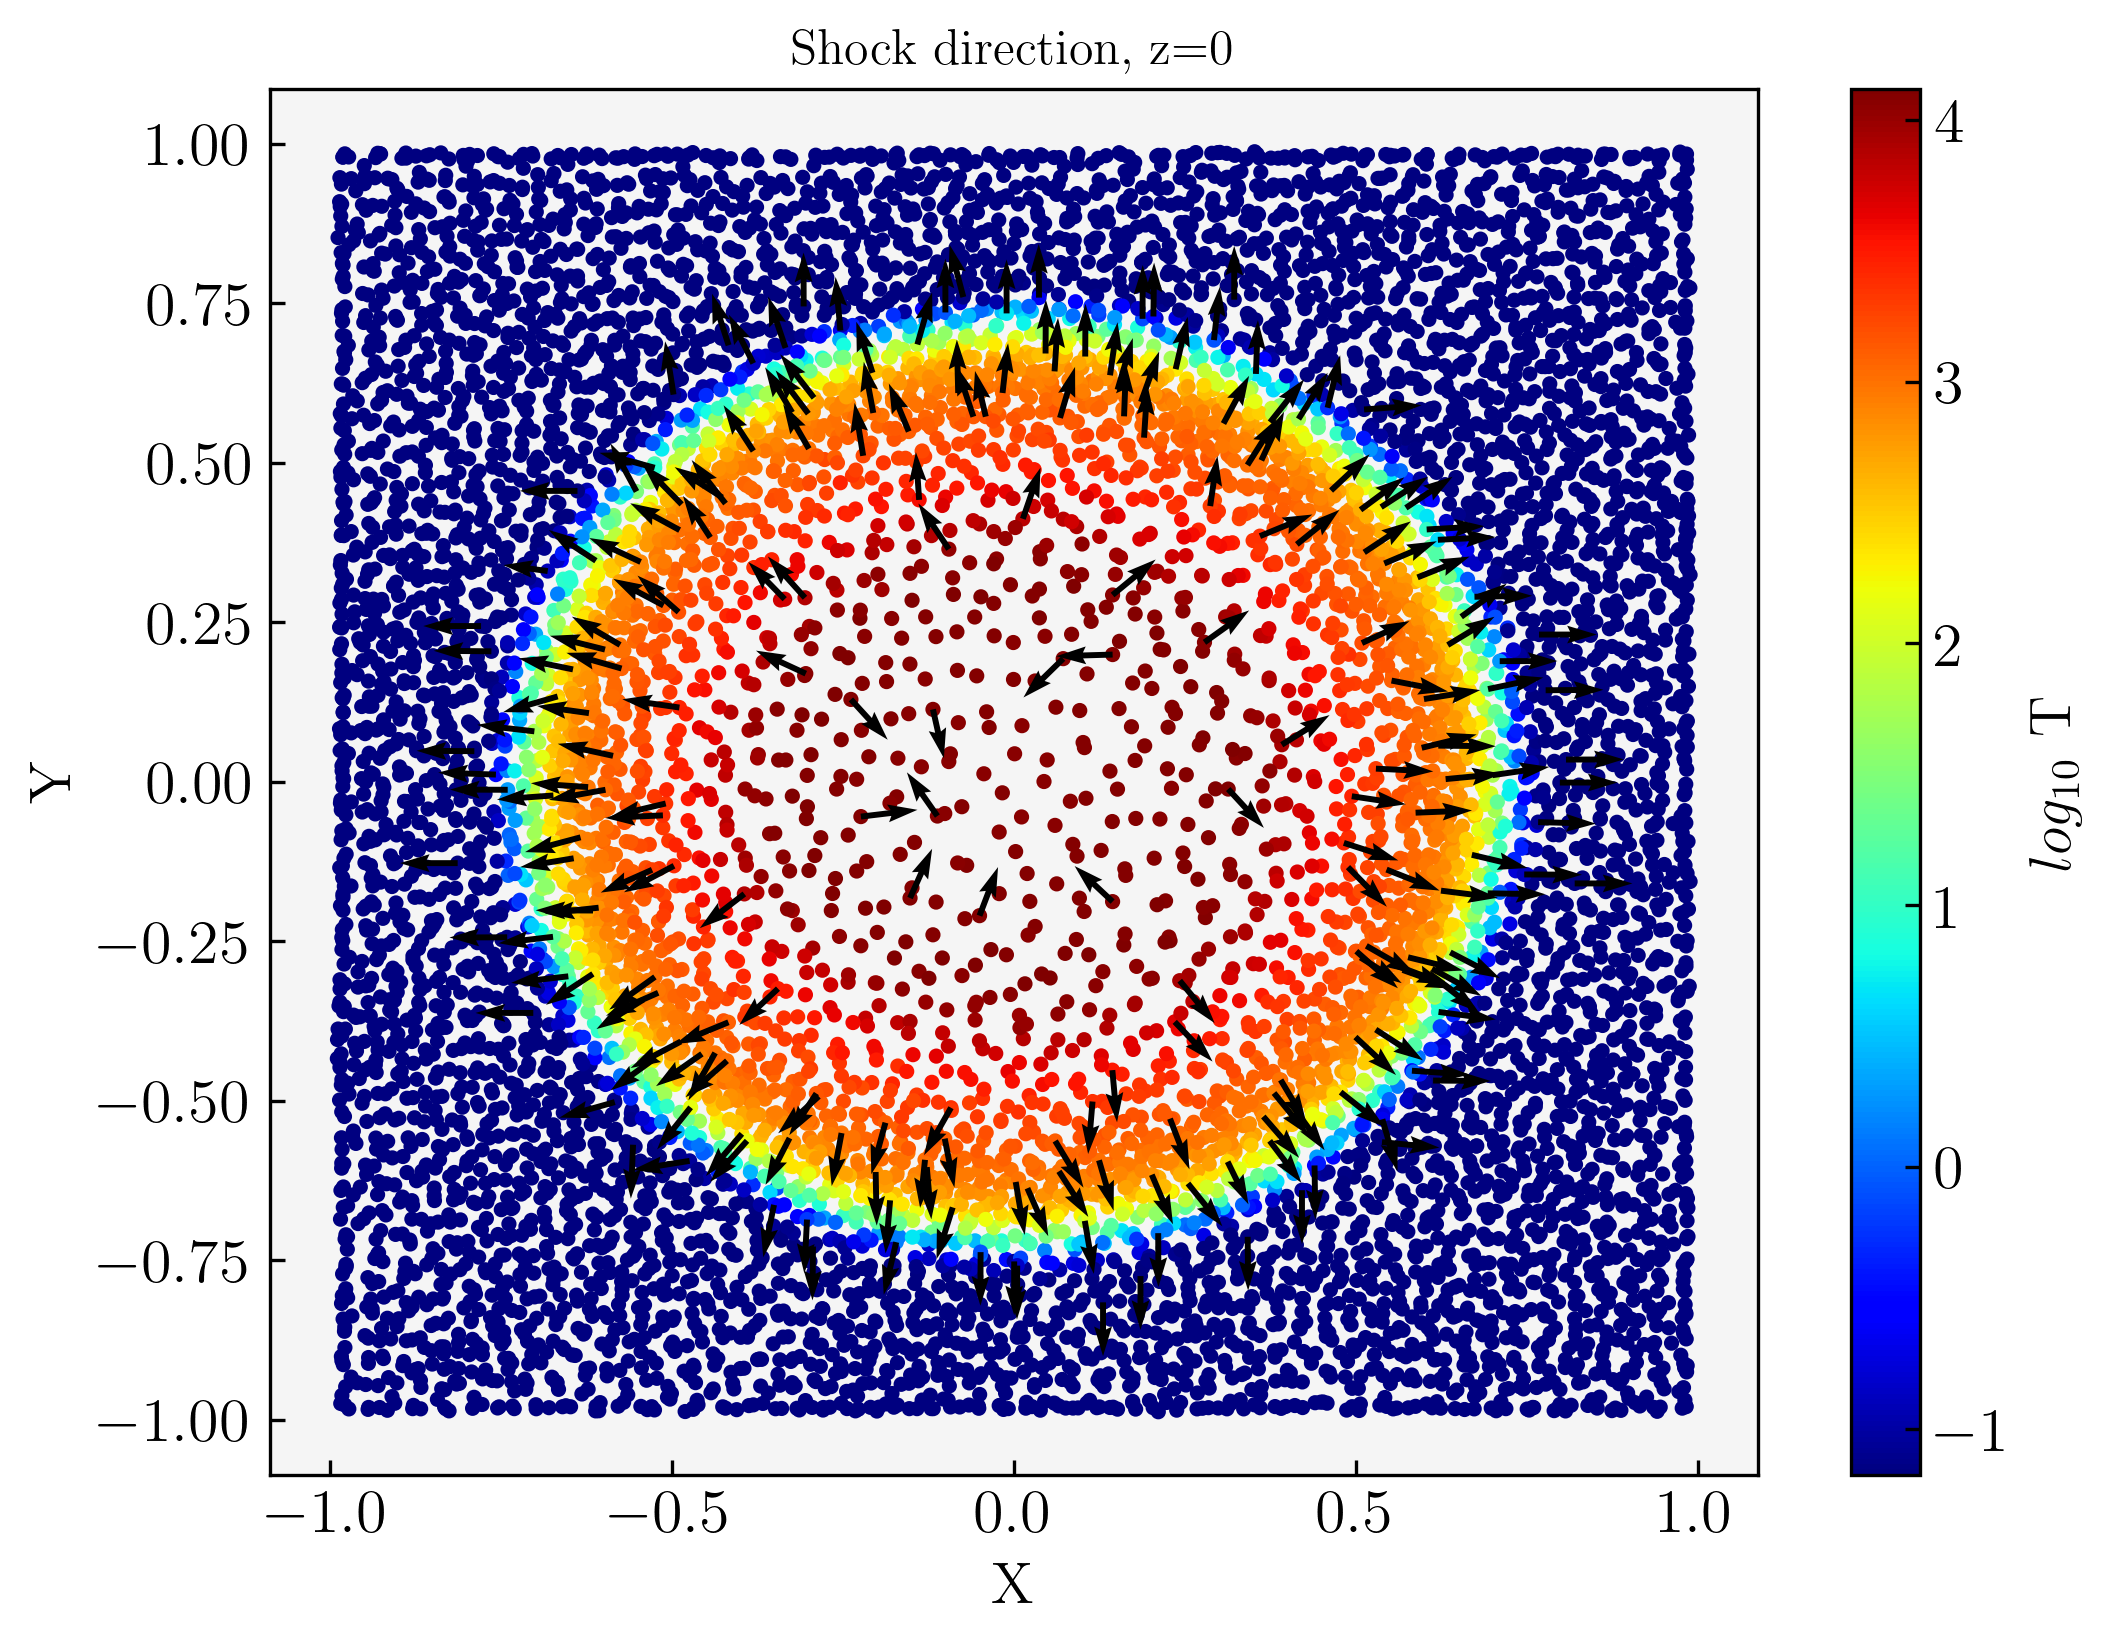

In [19]:
# Shock direction plot
fig1, ax1 = plt.subplots(1,1)
ax1.set_xlabel('X', fontsize = 14)
ax1.set_ylabel('Y', fontsize = 14)
img1 = ax1.scatter(x_radii, y_radii, c = T_plot, s = 7, cmap = 'jet')
cb = plt.colorbar(img1)
#plt.xlim(-0.5,0)
cb.set_label(r'$log_{10}$ T', fontsize = 14)
ax1.quiver(X_ds_plot[::20], Y_ds_plot[::20], dsx_plot[::20], dsy_plot[::20], color = 'k', angles='xy', scale_units='xy')
plt.title(f'Shock direction, z={z_chosen}')
plt.savefig(f'Figs/2shockDir_z{z_chosen}.png')

In [20]:
# # Histograms to see how big is the gradient. X component
# gradx_delta_hist = gradx_delta
# gradx_delta_hist[gradx_delta_hist<1e-2] = 0

# # Plot
# bins=np.arange(0, np.max(gradx_delta_hist), 300)
# plt.hist(gradx_delta_hist, bins=bins)
# plt.xlabel(r'$\Delta T/\Delta x$', fontsize = 16)
# plt.ylabel('Frequencies', fontsize = 16)
# plt.title(r'$N_{cell}$ = ' + f'{len(gradx_delta_hist)}', fontsize = 16)

# plt.figure()
# binszoom=np.arange(1, np.max(gradx_delta_hist), 300)
# plt.hist(gradx_delta_hist[gradx_delta_hist>1], bins=binszoom)
# plt.xlabel(r'$\Delta T/\Delta x$', fontsize = 16)
# plt.ylabel('Frequencies', fontsize = 16)
# plt.ylim(0,20)
# plt.title('zoom', fontsize = 16)


In [21]:
# # Histograms to see how big is the gradient. Y component
# grady_delta_hist = grady_delta
# grady_delta_hist[grady_delta_hist<1e-2] = 0

# # Plot
# bins=np.arange(0, np.max(grady_delta_hist), 300)
# plt.hist(grady_delta_hist, bins=bins)
# plt.xlabel(r'$\Delta T/\Delta y$', fontsize = 16)
# plt.ylabel('Frequencies', fontsize = 16)
# plt.title(r'$N_{cell}$ = ' + f'{len(grady_delta_hist)}', fontsize = 16)

# plt.figure()
# binszoom=np.arange(1, np.max(grady_delta_hist), 300)
# plt.hist(grady_delta_hist[grady_delta_hist>1], bins=binszoom)
# plt.xlabel(r'$\Delta T/\Delta y$', fontsize = 16)
# plt.ylabel('Frequencies', fontsize = 16)
# plt.ylim(0,20)
# plt.title('zoom', fontsize = 16)
